In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import cv2 as cv
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import random as rd

from utils import imread, get_P, get_silhouette, compute_F
from stereo import Stereo
from reconstruct import get_X, get_SIFT_keypoints

# Matching algorithm and SIFT keypoints examples

In [2]:
n1, n2 = 7, 8

img1 = imread(n1)
img2 = imread(n2)
h, w, _ = img1.shape

P1 = get_P(n1)
P2 = get_P(n2)

silhouette1 = get_silhouette(n1)
silhouette2 = get_silhouette(n2)

stereo = Stereo(w, h)

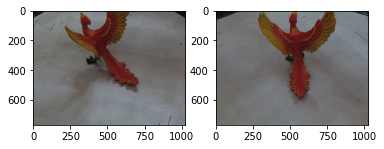

In [3]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img1)
f.add_subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [4]:
F = compute_F(P1, P2)

In [5]:
x = np.array([690, 480, 1])

## Best match on the epipolar line

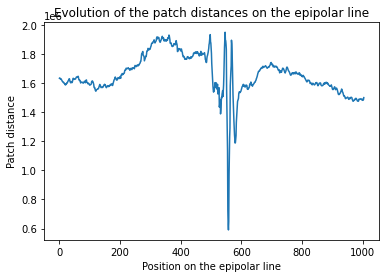

In [6]:
x2 = stereo.find_x2(x, F, img1, img2, kernel_size=[20,20], show=True)

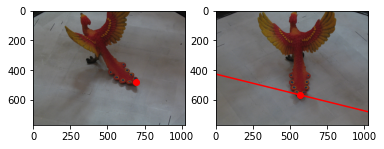

In [7]:
stereo.show_best_x2(img1, img2, x, x2, F @ x)

In [8]:
X = get_X(P1, P2, x,x2)

## SIFT keypoints

189 points of interest


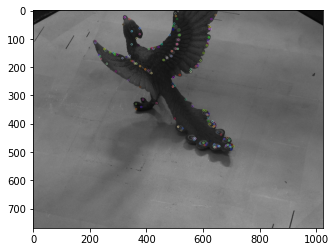

In [9]:
x_list = get_SIFT_keypoints(img1, silhouette1, show=True)
print(f"{len(x_list)} points of interest")